# Challenge: Merging Financial Datasets

### Description:
You are a fintech professional working on a project to analyze the relationship between stock prices and financial statements. You have two datasets:
- stock_prices: contains daily stock prices for various companies  
- financials: contains quarterly financial statement data (revenue, net income, etc.) for the same companies

Your task is to merge these two datasets on the company name and date, so that you can analyze the relationship between stock prices and financial performance.

### Pain Point:
The datasets have different structures and formats, making it difficult to combine them. You need to use Pandas to:
- Handle mismatched column names and data types
- Merge the datasets on multiple columns (company name and date)
- Handle missing values and duplicates

In [1]:
import pandas as pd
import numpy as np
import sys

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


# Create Data

In [3]:
financials = {
    'Symbol': ['AAPL', 'GOOG', 'MSFT', 'AAPL', 'GOOG'],
    'Date': ['2024-03-31', '2024-03-31', '2024-03-31', '2024-03-31', '2024-03-31'],
    'Revenue': [1000, 2000, 3000, 1200, 2500],
    'Net Income': [200, 400, 500, 250, 500]
}

# create DataFrames
financials_df = pd.DataFrame(financials)
financials_df

,Symbol,Date,Revenue,Net Income
0,AAPL,2024-03-31,1000,200
1,GOOG,2024-03-31,2000,400
2,MSFT,2024-03-31,3000,500
3,AAPL,2024-03-31,1200,250
4,GOOG,2024-03-31,2500,500


In [4]:
financials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      5 non-null      object
 1   Date        5 non-null      object
 2   Revenue     5 non-null      int64 
 3   Net Income  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


In [5]:
# we need to convert the dates from strings to date objects
financials_df['Date'] = pd.to_datetime(financials_df['Date'])
financials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Symbol      5 non-null      object        
 1   Date        5 non-null      datetime64[ns]
 2   Revenue     5 non-null      int64         
 3   Net Income  5 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 292.0+ bytes


In [6]:
# compress data
financials_df = financials_df.groupby(['Symbol','Date']).sum()
financials_df

,,Revenue,Net Income
Symbol,Date,,
AAPL,2024-03-31,2200,450
GOOG,2024-03-31,4500,900
MSFT,2024-03-31,3000,500


In [7]:
# set the date range
start_date = '2024-01-01'
end_date = '2024-03-31'

# generate a date range (daily)
dates = pd.date_range(start_date, end_date, freq='D')

# companies
companies = ['AAPL', 'GOOG', 'MSFT']

# generate random prices with missing values and duplicates
np.random.seed(500) # keep sequence the same
prices = np.random.uniform(low=50, high=500, size=(len(dates), len(companies)))
prices[np.random.choice(prices.shape[0], size=10, replace=False), :] = np.nan  # introduce missing values
prices = np.repeat(prices, 2, axis=0)  # introduce duplicates

# create a DataFrame
stock_prices_df = pd.DataFrame(prices, columns=companies)
stock_prices_df['Date'] = np.repeat(dates, 2)  # repeat dates for duplicates

# shuffle the data to mix up the duplicates
stock_prices_df = stock_prices_df.sample(frac=1).reset_index(drop=True)
stock_prices_df

,AAPL,GOOG,MSFT,Date
0,359.674643,342.778210,280.843618,2024-03-12
1,177.374228,431.584652,498.384691,2024-03-16
2,204.603302,495.466261,316.068859,2024-01-22
3,417.608290,460.682614,139.300499,2024-03-28
4,121.619000,246.874560,440.382502,2024-02-18
...,...,...,...,...
177,301.644022,88.299780,226.588576,2024-01-02
178,105.304424,327.655990,106.991148,2024-02-28
179,271.719726,238.858198,167.868603,2024-02-27
180,NaN,NaN,NaN,2024-03-21


In [8]:
stock_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   AAPL    162 non-null    float64       
 1   GOOG    162 non-null    float64       
 2   MSFT    162 non-null    float64       
 3   Date    182 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.8 KB


### Reshape df

The data came in with the Symbols as the columns. Since the quarterly data has the Symbols as a columns, we need to reshape the stock_prices_df.

In [9]:
# reshape and save in new variable
new = pd.DataFrame(stock_prices_df.set_index('Date').stack(), columns=['Price']).reset_index()

# sort by date and symbol
new = new.sort_values(by=['Date','level_1'])
new

,Date,level_1,Price
210,2024-01-01,AAPL,362.155787
216,2024-01-01,AAPL,362.155787
211,2024-01-01,GOOG,77.772647
217,2024-01-01,GOOG,77.772647
212,2024-01-01,MSFT,349.975219
...,...,...,...
450,2024-03-31,AAPL,420.118719
214,2024-03-31,GOOG,316.125091
451,2024-03-31,GOOG,316.125091
215,2024-03-31,MSFT,320.870742


Let's see some of these duplicates

In [10]:
mask1 = new.loc[:,'Date'] == pd.to_datetime('1/1/2024')
mask2 = new.loc[:,'level_1'] == 'AAPL'
mask3 = new.loc[:,'Price'].apply(lambda x: np.isclose(x,362.155787))
new[mask1 & mask2 & mask3]

,Date,level_1,Price
210,2024-01-01,AAPL,362.155787
216,2024-01-01,AAPL,362.155787


### Drop Duplicates

In [11]:
# identify dupes
dupes = new.duplicated()

# we are going to keep the first occurrence of any duplicate found
clean = new[dupes]
clean

,Date,level_1,Price
216,2024-01-01,AAPL,362.155787
217,2024-01-01,GOOG,77.772647
218,2024-01-01,MSFT,349.975219
474,2024-01-02,AAPL,301.644022
475,2024-01-02,GOOG,88.299780
...,...,...,...
265,2024-03-30,GOOG,437.673426
266,2024-03-30,MSFT,199.850571
450,2024-03-31,AAPL,420.118719
451,2024-03-31,GOOG,316.125091


In [12]:
# verify we have no duplicates
clean[clean.duplicated()]

,Date,level_1,Price


### Missing Values

Now I will be honest with you, I do not find Pandas and the Jupyter environment great for data gazing. I actually use pd.to_clipboard() and paste the data into Excel. There I have an easier time looking thriyugh the data to verify it looks good.

It looks like all the missing values were taken care of while working on the duplicates. The picture below came from the original data set.

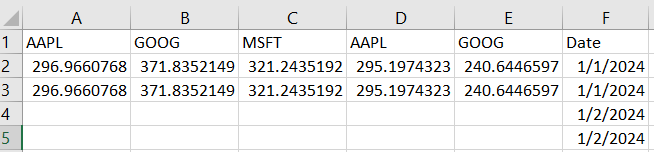

In [13]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 216 to 452
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     243 non-null    datetime64[ns]
 1   level_1  243 non-null    object        
 2   Price    243 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.6+ KB


In [14]:
#clean.to_clipboard()

### Merge data

For this tutorial I am simply going to group my daily data into quarterly so that both dataframes represent quarterly data.

In [15]:
# clean up column names
clean = clean.rename(columns={'level_1':'Symbol'})
clean

,Date,Symbol,Price
216,2024-01-01,AAPL,362.155787
217,2024-01-01,GOOG,77.772647
218,2024-01-01,MSFT,349.975219
474,2024-01-02,AAPL,301.644022
475,2024-01-02,GOOG,88.299780
...,...,...,...
265,2024-03-30,GOOG,437.673426
266,2024-03-30,MSFT,199.850571
450,2024-03-31,AAPL,420.118719
451,2024-03-31,GOOG,316.125091


In [16]:
# resample to quarterly frequency
clean_qtr = clean.groupby('Symbol').resample('QE', on='Date').mean()
clean_qtr

,,Price
Symbol,Date,
AAPL,2024-03-31,291.007603
GOOG,2024-03-31,299.556233
MSFT,2024-03-31,283.193836


In [17]:
# combine both dataframes
pd.concat([clean_qtr,financials_df], axis=1)

,,Price,Revenue,Net Income
Symbol,Date,,,
AAPL,2024-03-31,291.007603,2200,450
GOOG,2024-03-31,299.556233,4500,900
MSFT,2024-03-31,283.193836,3000,500


# How would you analyze the data above?

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>